# Propagación de Error

Sea $x$ un valor real y $\hat x$ una aproximación. Definimos el error de la aproximación como:

1.- Error absoluto : $\varepsilon_a=|x-\hat x|$

2.-Error relativo : $\varepsilon_r=\frac{|x-\hat x|}{|x|}$
	

In [1]:
function add_and_substract(x::Real,iterations::Int)::Real
    my_type=typeof(x)
    result=x
    #Add 
    for i in 1:1:iterations
        result+= my_type(1.0)/my_type(3.0)
    end 
    #Substract 
    for i in 1:1:iterations
        result-=my_type(1.0)/my_type(3.0)
    end
    return result    
end;

In [2]:
Float64(1.0/3.0)

0.3333333333333333

In [9]:
my_type=Float64
error_absoluto=my_type(0.0)
iter=1
while error_absoluto<eps(my_type)
    error_absoluto = abs(my_type(1.0)-add_and_substract(my_type(1.0),iter))
    error_relativo = error_absoluto/abs(1.0)
    println("error absoluto : $error_absoluto, error relativo $error_relativo, iteraciones : $iter")
    iter+=1
end;

error absoluto : 0.0, error relativo 0.0, iteraciones : 1
error absoluto : 0.0, error relativo 0.0, iteraciones : 2
error absoluto : 0.0, error relativo 0.0, iteraciones : 3
error absoluto : 0.0, error relativo 0.0, iteraciones : 4
error absoluto : 0.0, error relativo 0.0, iteraciones : 5
error absoluto : 0.0, error relativo 0.0, iteraciones : 6
error absoluto : 0.0, error relativo 0.0, iteraciones : 7
error absoluto : 0.0, error relativo 0.0, iteraciones : 8
error absoluto : 4.440892098500626e-16, error relativo 4.440892098500626e-16, iteraciones : 9


# Error de Aproximación

Sabemos que la función $f(x)=e^x$ puede ser aproximada mediante la serie de Taylor truncada:

$e^x = 1 + x + \frac{x^2}{2!} + \frac{x^3}{3!} + \frac{x^4}{4!} + \cdots.$

Por ejemplo, si evaluamos $f(1)$ debiesemos obtener un valor cercano a $e$

In [26]:
exp(1.)

2.718281828459045

In [11]:
function taylor_series_exp(x::Float64,k::Int)::Float64
    range=1:1:k
    res=1.
    for i in range
        res+=(x^i)/factorial(big(i))
    end
    return res
end

taylor_series_exp (generic function with 1 method)

In [28]:
using Printf

err=Inf
k=1
error=Vector{Float64}()
orden=Vector{Int}()
while err>eps(Float64)
    val=taylor_series_exp(1.,k)
    err=abs(exp(1.)-val)
    @printf("val : %f, orden : %d, error : %.16f \n",val,k,err)
    append!(error, err)
    append!(orden, k)
    k+=1
end


val : 2.000000, orden : 1, error : 0.7182818284590451 
val : 2.500000, orden : 2, error : 0.2182818284590451 
val : 2.666667, orden : 3, error : 0.0516151617923786 
val : 2.708333, orden : 4, error : 0.0099484951257116 
val : 2.716667, orden : 5, error : 0.0016151617923783 
val : 2.718056, orden : 6, error : 0.0002262729034896 
val : 2.718254, orden : 7, error : 0.0000278602050767 
val : 2.718279, orden : 8, error : 0.0000030586177751 
val : 2.718282, orden : 9, error : 0.0000003028858528 
val : 2.718282, orden : 10, error : 0.0000000273126606 
val : 2.718282, orden : 11, error : 0.0000000022605522 
val : 2.718282, orden : 12, error : 0.0000000001728764 
val : 2.718282, orden : 13, error : 0.0000000000122862 
val : 2.718282, orden : 14, error : 0.0000000000008153 
val : 2.718282, orden : 15, error : 0.0000000000000506 
val : 2.718282, orden : 16, error : 0.0000000000000027 
val : 2.718282, orden : 17, error : 0.0000000000000000 


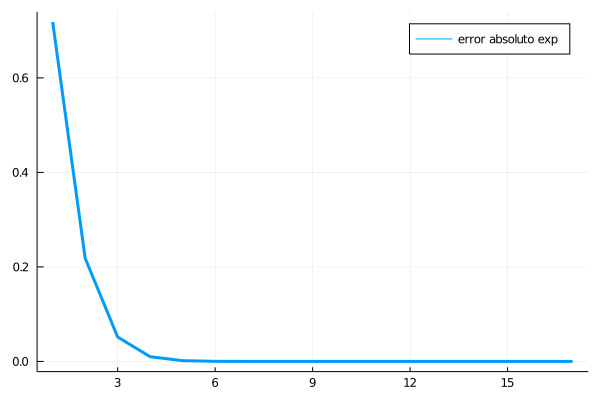

In [29]:
using Plots

plot(orden, error,label="error absoluto exp",lw=3)

# Ejercicio 1

Ahora queremos evaluar la siguiente expresión $\text{sin}(x)$ usando una serie de Taylor.

Sabemos que la expansión puede ser escrita como:

$\sin(x) = x - \frac{x^3}{3!} + \frac{x^5}{5!} - \frac{x^7}{7!} + \cdots.$

Programe la serie de Taylor y evalúe el orden de acuerdo a la precisión de maquina para doble precisión, precisión simple y precisión media.

In [30]:
# Serie de Taylor para la función sin(x)

# Ejercicio 2

Un cultivo de bacterias crece de acuerdo con la función de crecimiento logistico

$y=\frac{1.25}{1+0.25*\text{exp}(-0.4*t)}$ para $0 \geq t$

1.- Encuentre el valor de $y(t)$ para distintos valores $0<dt<25$ haciendo $dt=0.2$. Grafique los resultados. 

2.- Utilice la expansión de series de Taylor para la función exponencial y simule el crecimiento de bacterias $\hat y(t)$ usando esta aproximación.

3.- Encuentre el orden $k$ de la serie de taylor para el cual el error absoluto $\varepsilon_a=| y(25)- \hat y(25)|$ es menor que el epsilon de maquina. Grafique 